# CALIFORNIA HOUSING PRICE DATASET PROJECT

**This notebook contains the project work of predicting  the Median Housing Prices of houses in California using California Housing Dataset.**

**IMPORT DEPENDENCIES **

In [2]:
import numpy as np
import pandas as pd

In [3]:
# Load dataset housing.csv using Pandas

df = pd.read_csv('housing.csv')

In [4]:
# A Quick look at the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [6]:
df.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

In [7]:
# Getting Visuals of Data using MATPLOTLIB
# Import matplotlib

import matplotlib.pyplot as plt
%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001783B792748>,
      dtype=object)

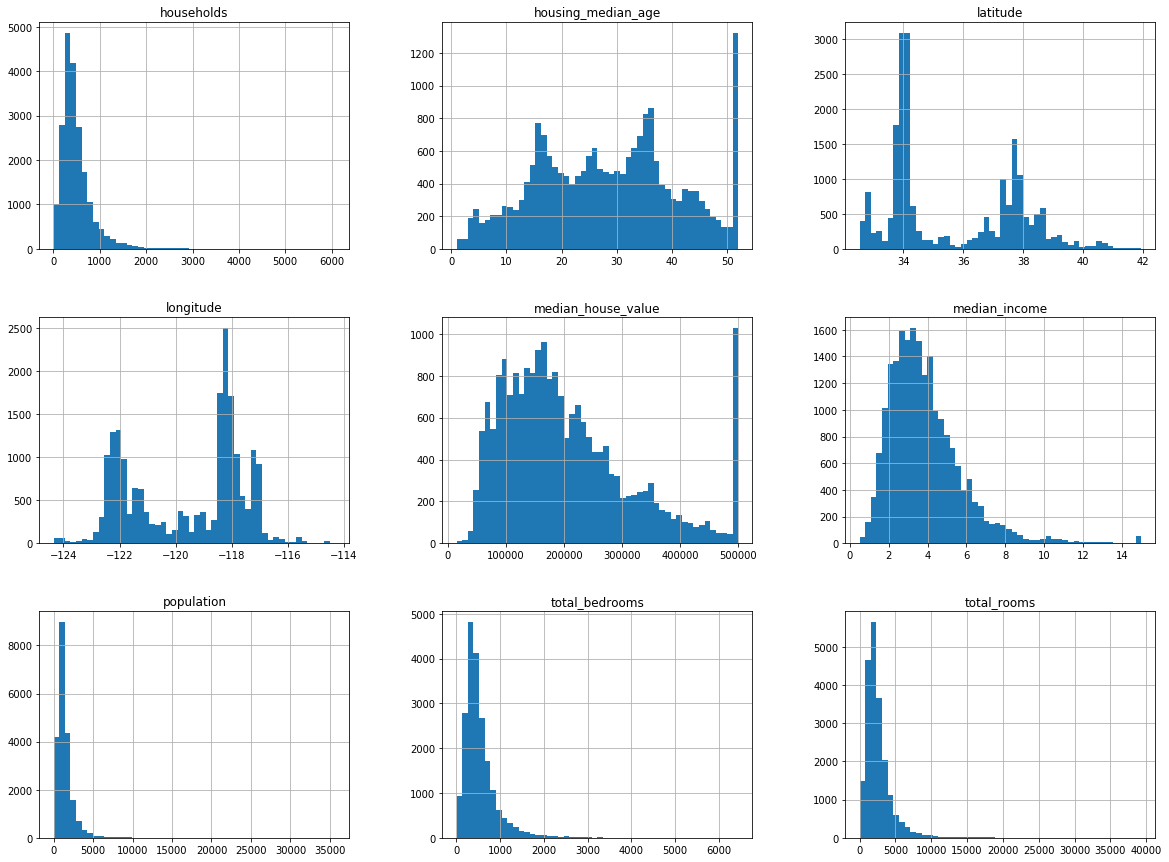

In [8]:
# Plotting Histogram to Visualise data

plt.show()
df.hist(bins = 50, figsize=(20,15))

In [9]:
# Creating a 'TEST SET ' USING 'NumPy'

# Dividing data into train and test set

from sklearn.model_selection import train_test_split


In [10]:
train_set, test_set = train_test_split(df,test_size = 0.2, random_state = 42)

**Since, Median Income is also an important attribute to predict housing prices. so, we want to ensure that the test set is representative of various categories of incomes in the whole dataset. Therefore we create an income category attribute**

 the following code creates an income category attribute by dividing income by 1.5 and rounding up using 'ceil'(to have discrete categories) and then merging all the categories greater than 5 into category 5

In [11]:
df['income_cat'] = np.ceil(df['median_income']/1.5)
df['income_cat'].where(df['income_cat'] <5 ,5.0 , inplace =True )

In [12]:
df.head()

# income_cat is concatenated to the orignal data

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  \
0       322.0       126.0         8.3252            452600.0        NEAR BAY   
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY   
2       496.0       177.0         7.2574            352100.0        NEAR BAY   
3       558.0       219.0         5.6431            341300.0        NEAR BAY   
4       565.0       259.0         3.8462            342200.0        NEAR BAY   

   income_cat  
0         5.0  
1         5.0  
2         5.0  
3         4.0  
4         3.0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001784416E7F0>]],
      dtype=object)

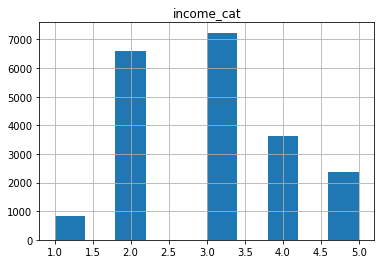

In [13]:
df.hist('income_cat')

**STRATIFIED SAMPLING (maintaing ratio to prevent sampling bias )based on the income category using sklearn's StratifiedShuffleSplit class** 

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit

In [15]:
split = StratifiedShuffleSplit(n_splits = 1,test_size = 0.2,random_state =42)

In [16]:
for train_index, test_index in split.split(df,df['income_cat']):
    strat_train_set =df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [17]:
df['income_cat'].value_counts() / len(df)

# this tells the proportion of income_cat in test set

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [18]:
# removing income_cat attribute so data is back to  its orignal form

df.drop('income_cat',axis = 1, inplace = True)

In [19]:
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

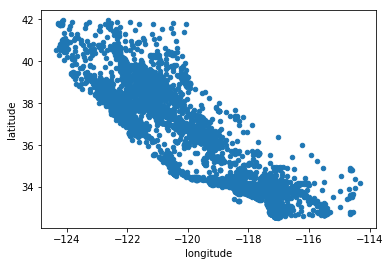

In [20]:
# Visualizing Geographical data using ScatterPlot

df.plot(kind = 'scatter', x= 'longitude', y = 'latitude')

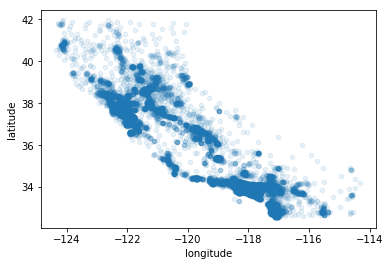

In [21]:
# try setting alpha( it makes it easy to visualize the places where there is high density)

df.plot(kind = 'scatter', x= 'longitude', y = 'latitude', alpha = 0.1)

In [22]:
# lets look at the housing prices

**The radius of each circle represents the district's population and the color represents the price .**
**We will use predefined color map called 'jet' which ranges from blue(low values) to red(high values)

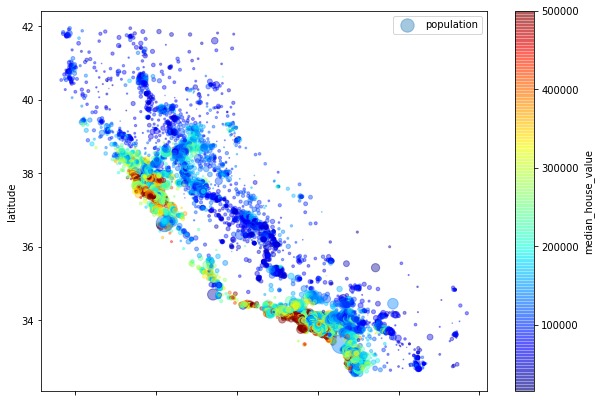

In [23]:
df.plot(kind = 'scatter' , x= 'longitude', y = 'latitude', alpha = 0.4, s=df['population']/100,  label = 'population',figsize=(10,7), c= 'median_house_value' , cmap = plt.get_cmap('jet'), colorbar=True)
plt.legend()


The above image tells us that the housing prices are very much related to the location and to the population density

# Looking for correlations 
since the data is not too large therefore we can easily compute the standard correlation coefficient between every pair of attributes using corr() method.

In [24]:
corr_matrix = df.corr()

In [25]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

**The Correlation ranges from -1 to 1 . when it is close to 1 means highly correlated and when it is close to -1 means poorly correlated .
thus we can also drop out the poorly correlated attributes. & coefficients close to zero means there is no linear correlation ** 

**Another way to check correlation is to use pandas scatter_matrix function which plots every numerical attribute against every other numerical attribute**

In [26]:
from pandas.tools.plotting import scatter_matrix


c:\users\user\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001784444D748>,
      dtype=object)

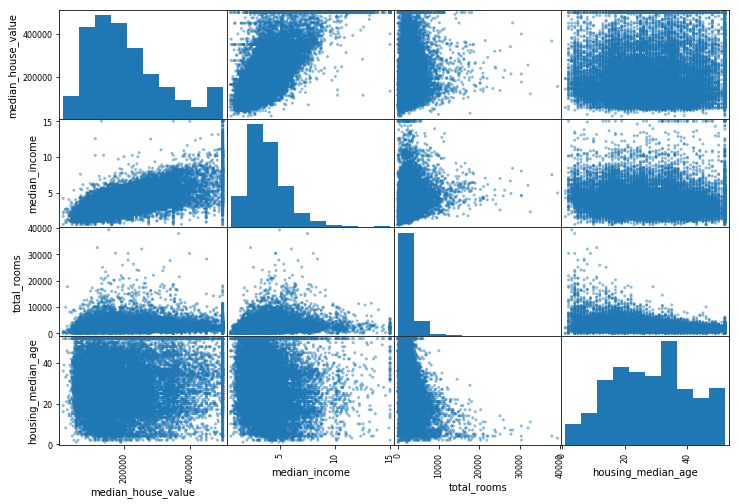

In [27]:
attributes = ['median_house_value','median_income','total_rooms','housing_median_age']
scatter_matrix(df[attributes], figsize= (12,8))

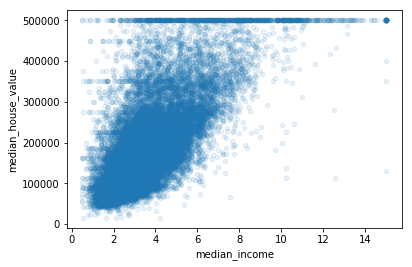

In [28]:
df.plot(kind='scatter',x ='median_income',y = 'median_house_value',alpha =0.1)

In [29]:
# Above plot shows that correlation between 'median_income' and 'median_house_value' is very strong as poits are not too dispersed.
 

# Experimenting with Attribute Combinations

In [30]:
df['rooms_per_household']= df['total_rooms']/df['households']
df['bedrooms_per_room'] = df['total_bedrooms']/df['total_rooms']
df['population_per_household']= df['population']/df['households']

In [32]:
corr_matrix = df.corr()

In [33]:
corr_matrix['median_house_value'].sort_values(ascending=False)

# we see that bedroom_per_room data is more corelated with median house value

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

# PREPARING DATA 